#`This notebook is an Illustration to create a Classifer which predicts whether a person has diabetes or not with Sklearn using Python 🐍`



## **Setup**
Let's setup the imports:  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Exploratory Data Analysis**
Let's load the Diabetes dataset which is uploaded on my Google Drive.

In [7]:
!gdown --id 1sR_DQVS_mdyXx6VLrzDrVCciiwVpklaJ

Downloading...
From: https://drive.google.com/uc?id=1sR_DQVS_mdyXx6VLrzDrVCciiwVpklaJ
To: /content/diabetes.csv
100% 62.1k/62.1k [00:00<00:00, 48.0MB/s]


Let's read the CVS file: 

In [8]:
df = pd.read_csv('/content/diabetes.csv') 

First few rows in the DataFrame:

In [9]:
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [10]:
# Returns an object with all of the column headers 
df.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
# Returns number of rows and columns of the dataset
df.shape 

(2000, 9)

In [12]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


Let's create a copy of the dataFrame which contains only certain features:

In [13]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

We replaced all the null values to NaN for a certain columns:

In [14]:
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

Let's see the Histogram of Uncleaned data:

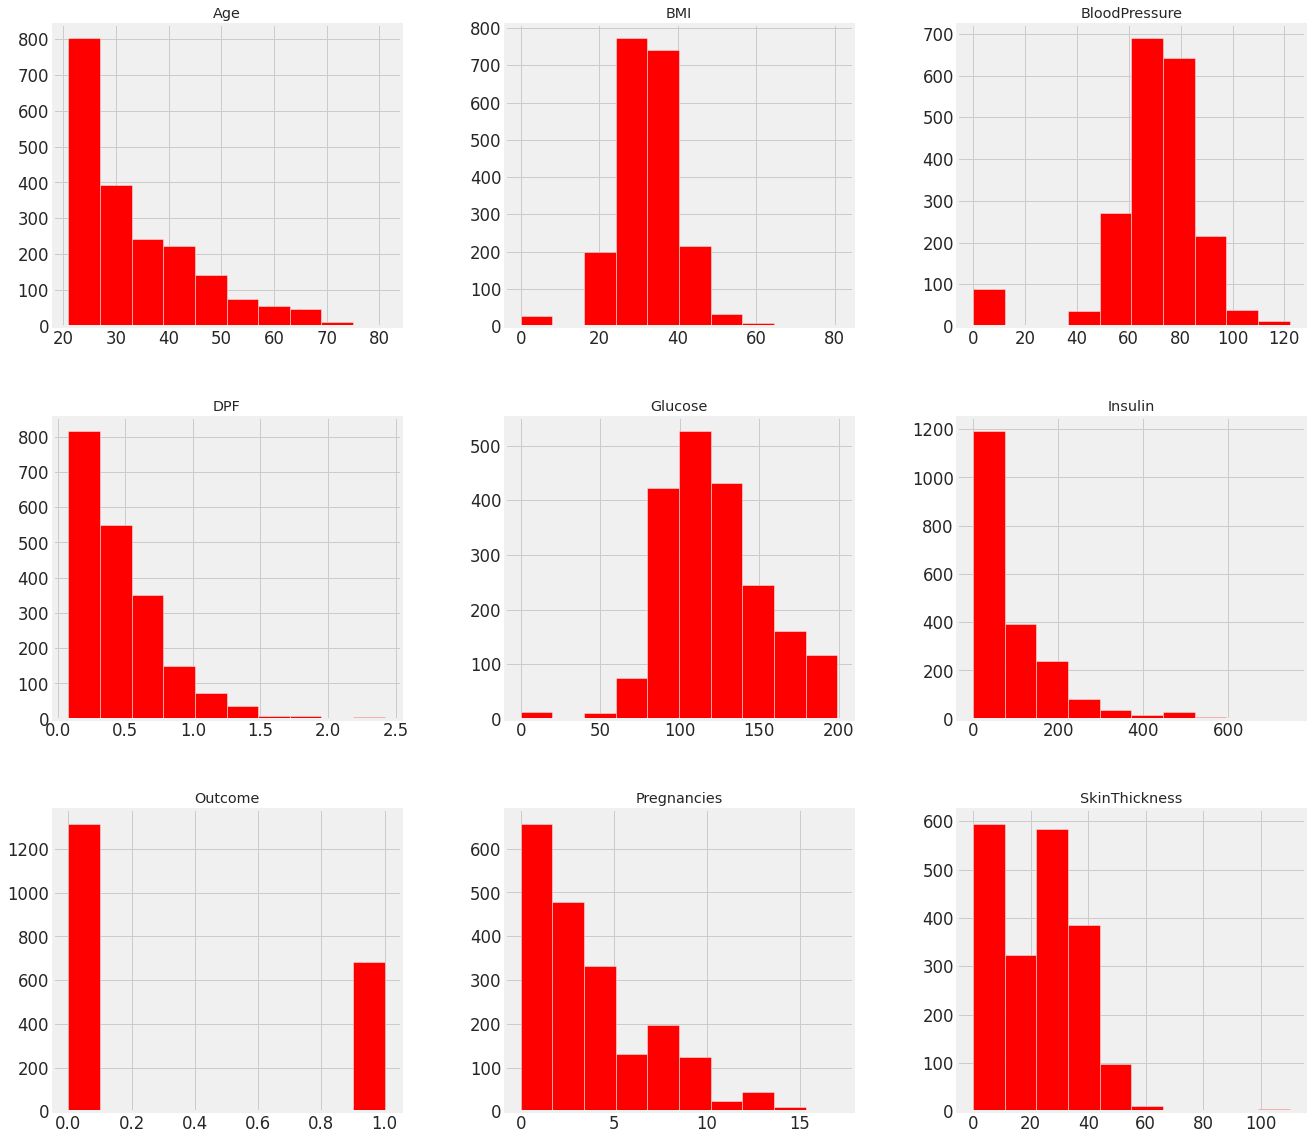

In [15]:
p = df.hist(figsize = (20,20), color='red')

Let's see the Histogram of cleaned data:

In [16]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True) 
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True) 
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True) 
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True) 
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True) 

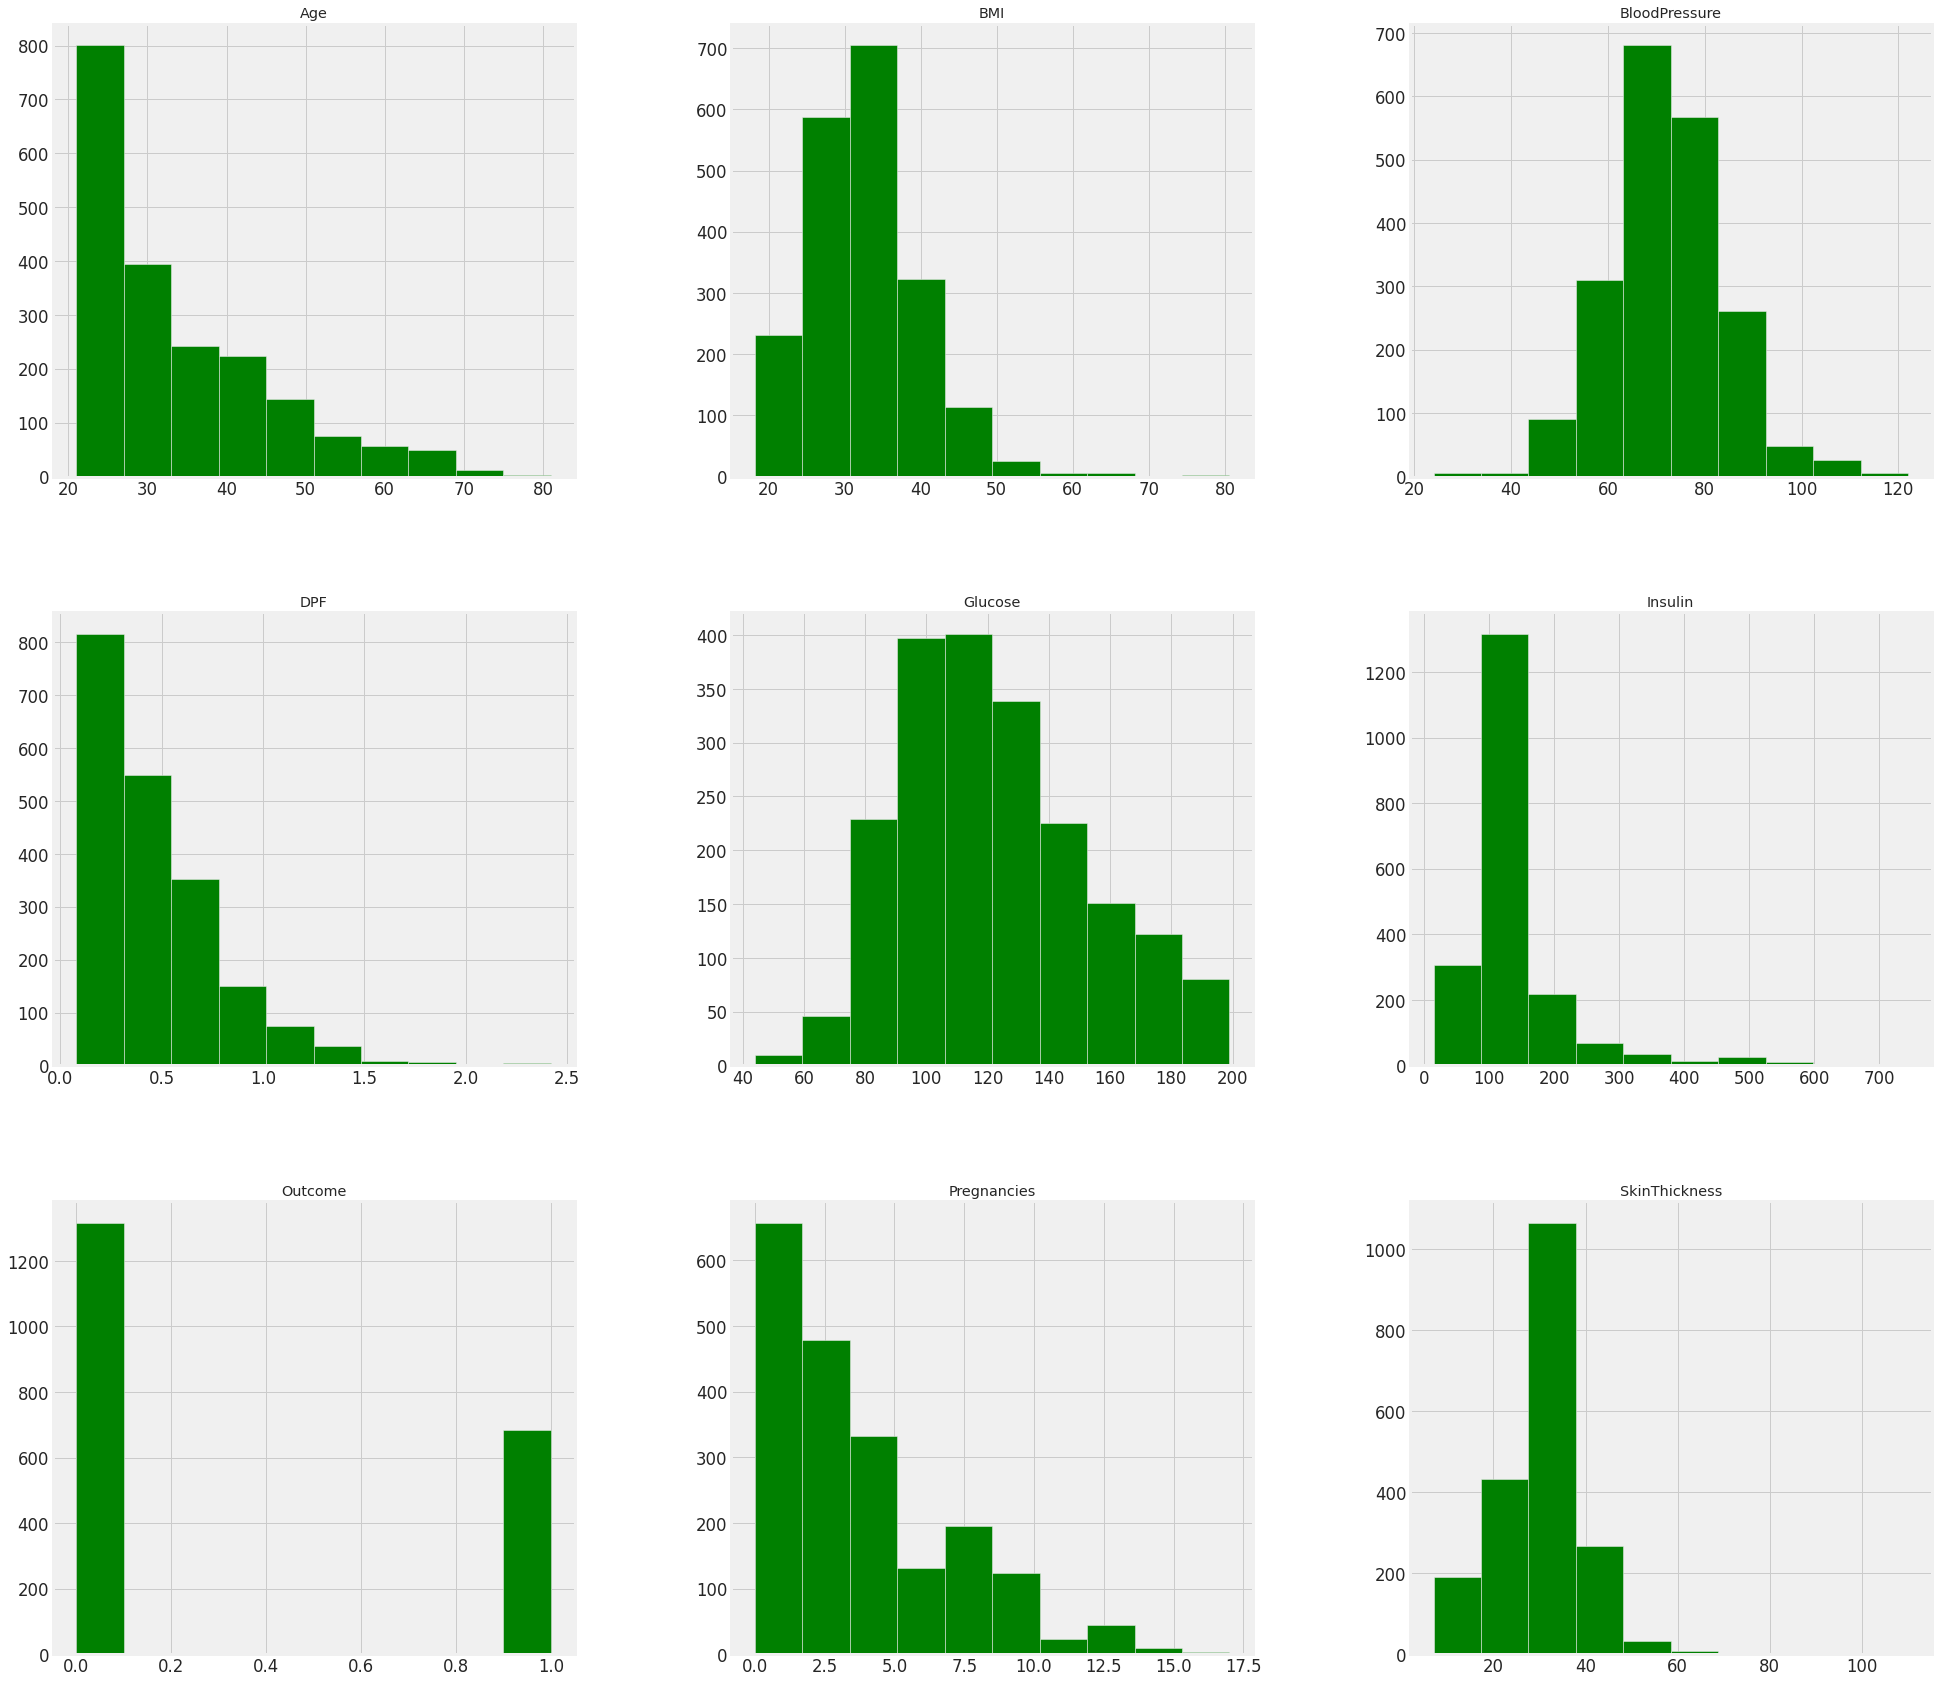

In [17]:
p = df_copy.hist(figsize = (30, 30), color='green') 

Shape of the DataFrame:

In [18]:
df.shape

(2000, 9)

### Let's take a look at the Scatter Matrix of the Uncleaned Data:

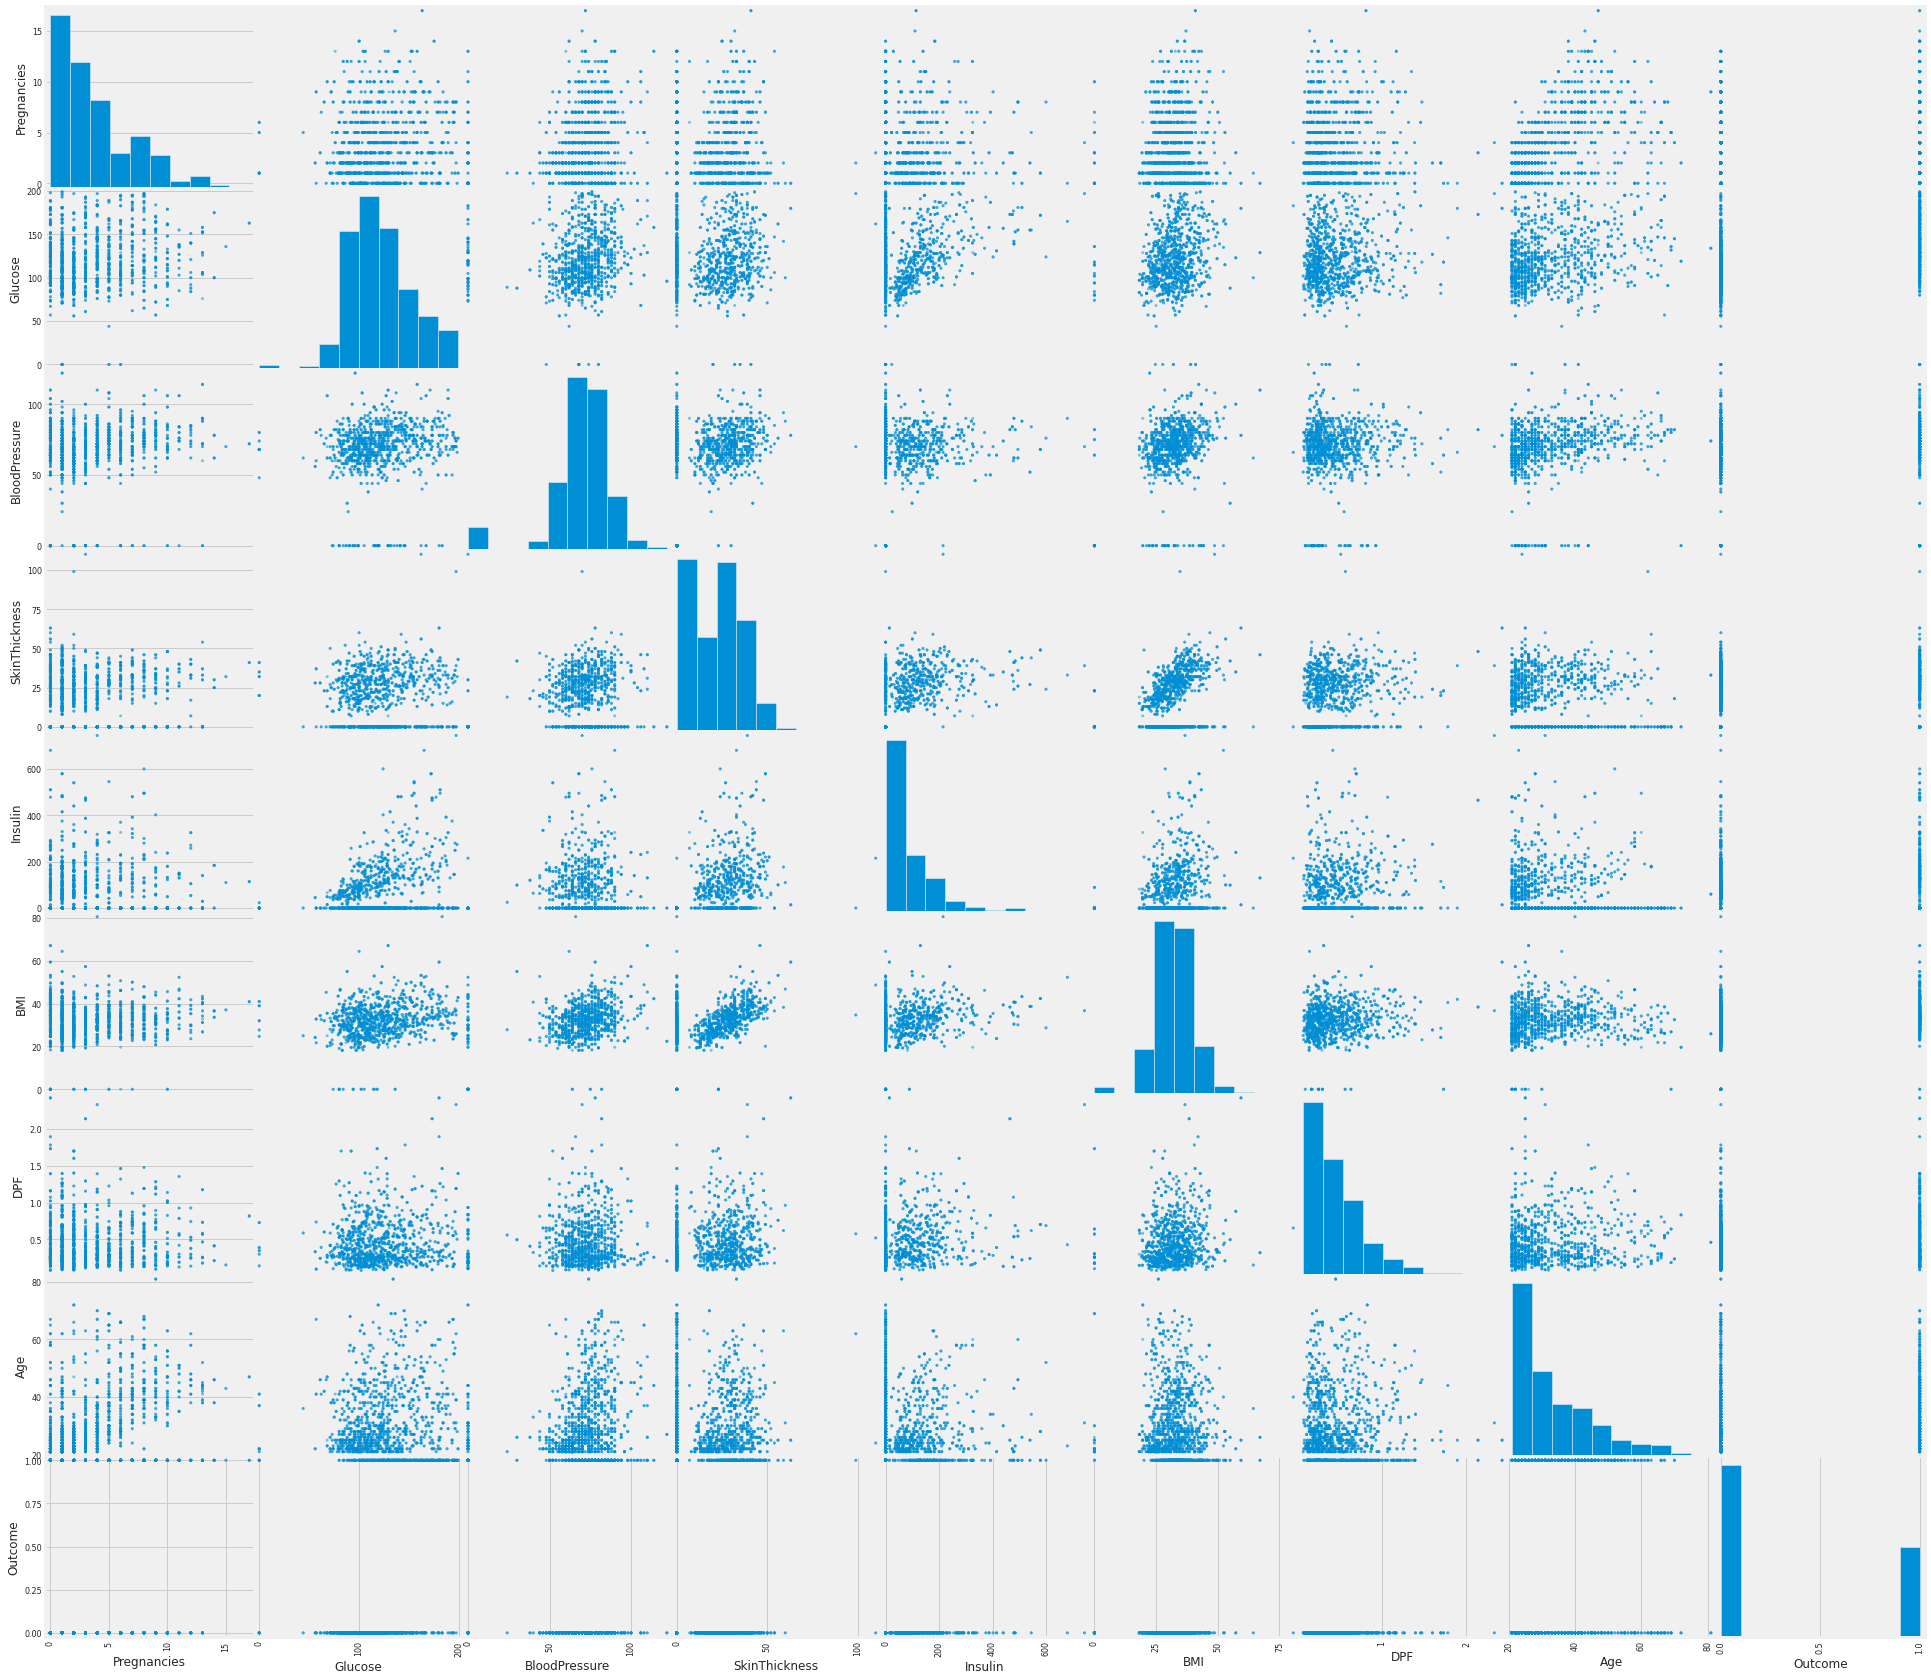

In [19]:
p = scatter_matrix(df, figsize=(30, 30)) 

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables. 

### Let's see the pairplot of Cleaned Data:

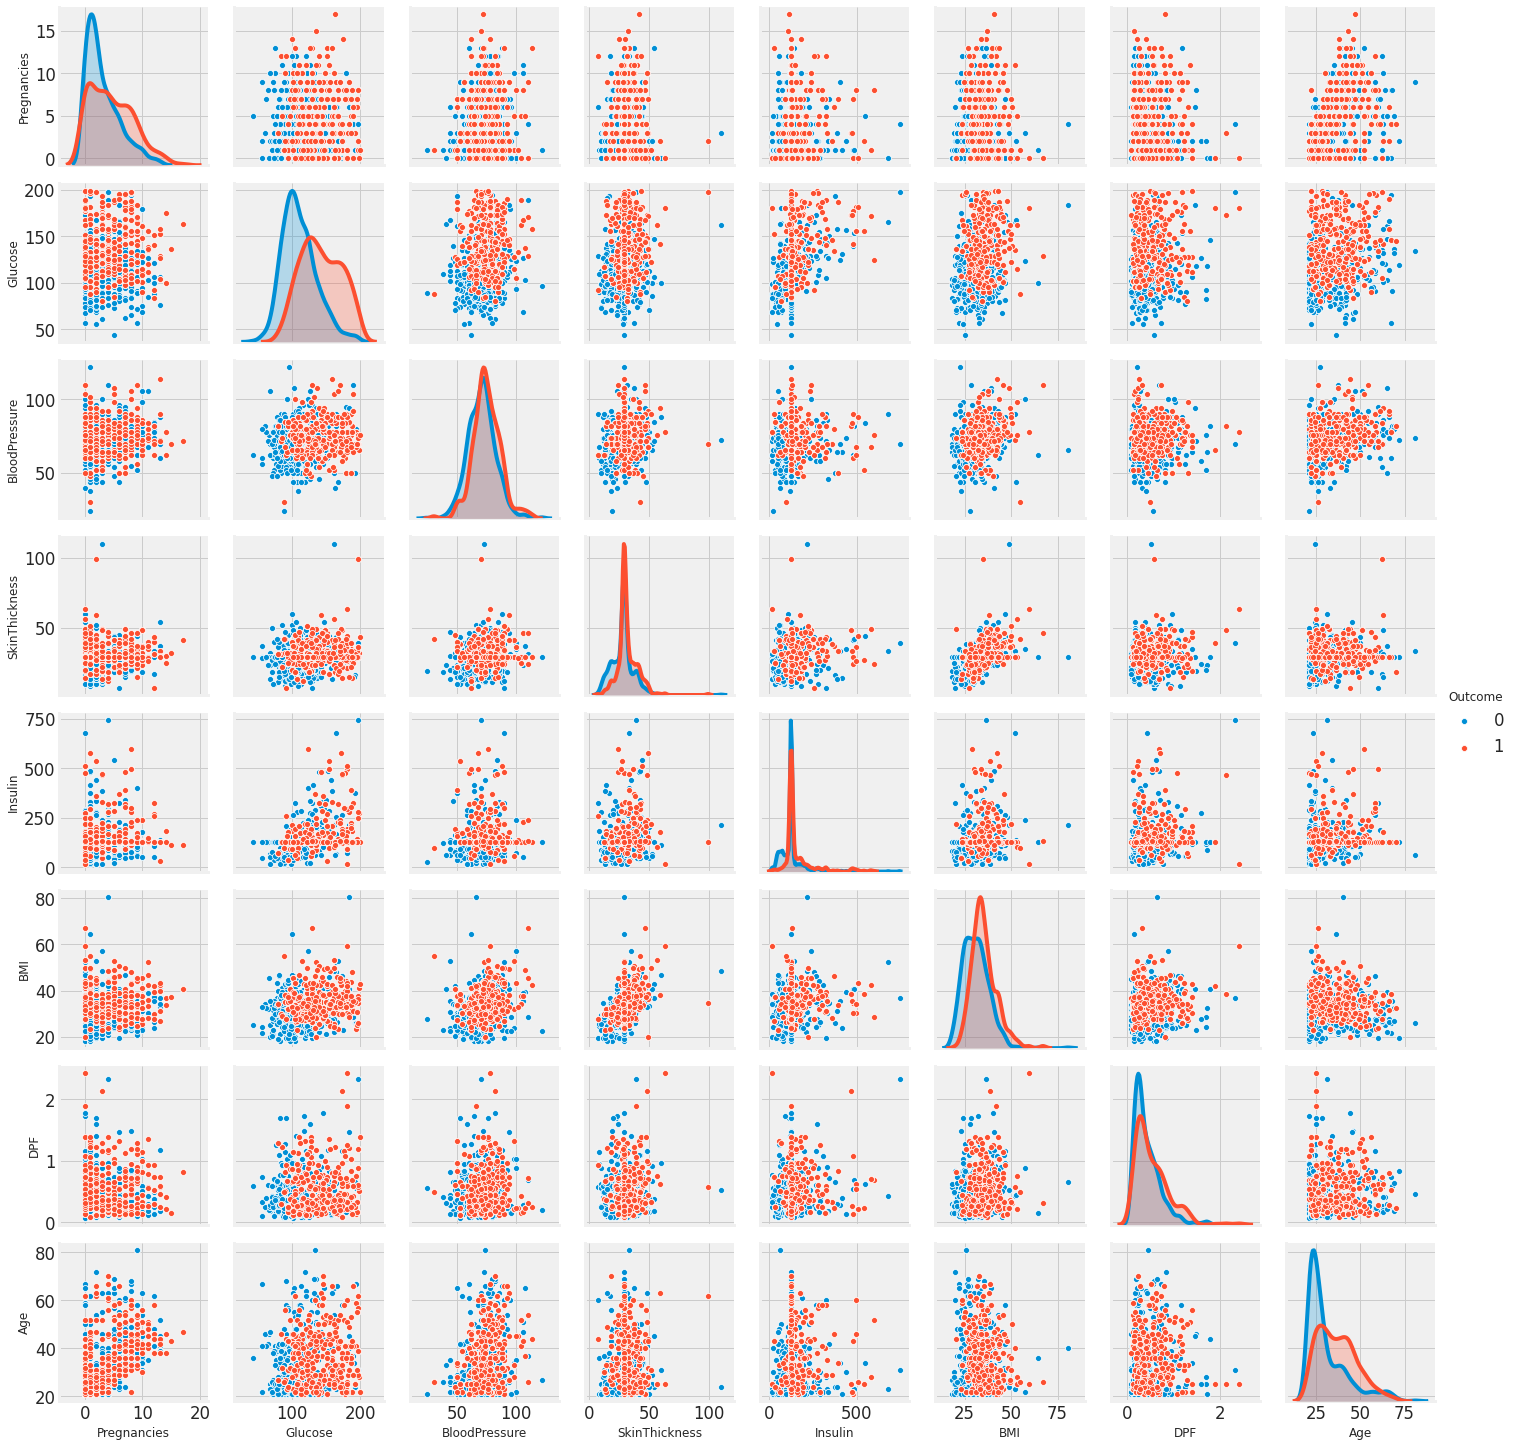

In [20]:
p = sns.pairplot(df_copy, hue = 'Outcome') 

`About Stratify` : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

`For example`, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, `stratify=y` will make sure that your random split has 25% of 0's and 75% of 1's.


## Let's scale down our dataFrame using StandardScalar:

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x =  pd.DataFrame(sc.fit_transform(df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']) 

In [22]:
x.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.515394,0.524960,-0.870852,0.631010,-0.177601,0.132630,-1.063246,1.180424
1,-1.120495,-1.244054,0.803273,0.192542,-0.189864,0.772550,-0.735551,-0.856326
2,-1.120495,0.754277,0.000000,-0.026692,-0.177601,1.607229,0.491759,-0.177409
3,-1.120495,0.426682,-0.368614,1.398329,1.343080,1.342914,-0.327478,-0.771462
4,-0.817945,0.557720,-0.870852,1.288712,4.163696,1.120333,0.201161,-1.026055


In [23]:
y = df_copy['Outcome']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
print('X_train size: {}, X_test size: {}'.format(x_train.shape, x_test.shape)) 

X_train size: (1600, 8), X_test size: (400, 8)


In [28]:
# Creating a function to calculate best model for this problem

def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        },
        'xg_boost': {
            'model': xgb.XGBClassifier(silent=False, random_state=15),
            'parameters': {
                'learning_rate':[0.001,0.01,0.1],
                'n_estimators':[10,15,20,50,100,200],
                'max_depth':[1,2,3]
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(x_train, y_train) 

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.763750
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.926250
2,random_forest,{'n_estimators': 200},0.961875
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.866250
4,xg_boost,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.888750


In [29]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(x_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

For Reference: [confusion](https://medium.com/@djocz/confusion-matrix-aint-that-confusing-d29e18403327)

## Let's plot the confusion Matrix:

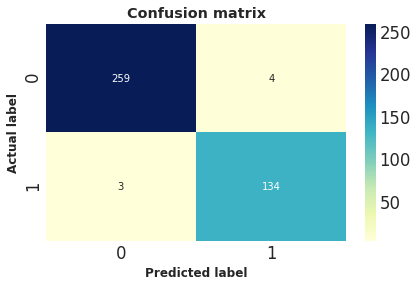

In [30]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt='g'); 
plt.title('Confusion matrix', fontweight='bold')
plt.ylabel('Actual label', fontweight='bold')
plt.xlabel('Predicted label', fontweight='bold');

## Let's see the Classification Report:

In [31]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       263
           1       0.97      0.98      0.97       137

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [33]:
import pickle

# Creating a pickle file for the classifier
filename = 'diabetes-rfc-model.pkl'
pickle.dump(classifier, open(filename, 'wb')) 

## Summary

You now have learned to:

* In-depth understanding of Exploratory Data Analysis
* Intuitively understand various classifiers
* Preprocess data for the classifier
* Visualize Model performance


## References
-  [EDA](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
- [Paper](https://research.nii.ac.jp/ntcir/workshop/OnlineProceedings8/NTCIR/07-NTCIR8-PATMN-CaiY.pdf)